In [364]:
import pandas as pd
import numpy as np
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [1]:
%store -r nyc_df

In [208]:
df_health = pd.read_csv('nyc_healthcare.csv')

In [155]:
nyc_df1 = nyc_df.copy()

In [156]:
nyc_df1.head()

,Neighborhood,Borough,Longitude,Latitude
0,Wakefield,Bronx,-73.847201,40.894705
1,Co-op City,Bronx,-73.829939,40.874294
2,Eastchester,Bronx,-73.827806,40.887556
3,Fieldston,Bronx,-73.905643,40.895437
4,Riverdale,Bronx,-73.912585,40.890834


#### Find and clean differences between the dataframes

In [157]:
uniq_neighborhoods = df_health1['Neighborhood'].unique() # Get the unique neighborhoods from healthcare df
uniq_nyc = nyc_df['Neighborhood'].unique() # Get the unique neighborhoods from the city df
uniq_diffs = list(set(uniq_neighborhoods).difference(uniq_nyc)) # Get the non-matching neighborhoods from both.
similarities = list(set(uniq_neighborhoods).intersection(uniq_nyc)) # Get matching neighborhoods
uniq_rev_dif = list(set(uniq_nyc).difference(uniq_neighborhoods))
print(len(similarities))
print(len(uniq_diffs))
print(len(uniq_rev_dif))

185
100
121


In [201]:
uniq_differences = uniq_diffs + uniq_rev_dif # Concatenate unique lists
uniq_differences = list(dict.fromkeys(uniq_differences)) # Get rid of duplicates
uniq_differences = [x for x in uniq_differences if str(x) != 'nan'] # Get rid of NaN values
uniq_difference = sorted(uniq_differences) # Sort values alphabetically
uniq_difference = pd.DataFrame(uniq_difference)
uniq_difference = uniq_difference.rename(columns={0: 'Unique Neighborhoods'})
uniq_difference1 = uniq_difference.head(10)
uniq_difference2 = uniq_difference[10:20]
uniq_difference2

,Unique Neighborhoods
10,Bedford Park
11,Bedford Stuyvesant
12,Beekman
13,Belle Harbor
14,Bellerose
15,Bellevue
16,Bergen Beach
17,Beverly Square West
18,Bloomfield
19,BoCoCa


In [202]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="Jules098")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (uniq_difference1["Unique Neighborhoods"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [203]:
latitude, longitude

([41.7690519,
  40.6834364,
  41.6109269,
  40.5767844,
  40.7242205,
  47.6144219,
  40.6203822,
  42.519116,
  40.7510398,
  50.0697456],
 [-87.7770096,
  -73.9412488,
  -73.7129076,
  -73.84782868947303,
  -73.7164845,
  -122.192337,
  -73.9068033,
  -83.227226,
  -92.4143872,
  19.9260176])

## Data Cleaning

In [321]:
print(df_health.shape)
df_health.head()

(6069, 6)


,Venue,Category,Latitude,Longitude,Neighborhood,ZIP
0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466
1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475
2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475
3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475
4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475


In [322]:
nyc_df.head()

,Neighborhood,Borough,Longitude,Latitude
0,Wakefield,Bronx,-73.847201,40.894705
1,Co-op City,Bronx,-73.829939,40.874294
2,Eastchester,Bronx,-73.827806,40.887556
3,Fieldston,Bronx,-73.905643,40.895437
4,Riverdale,Bronx,-73.912585,40.890834


In [323]:
df_health['Neighborhood'].nunique(), nyc_df['Neighborhood'].nunique()

(239, 306)

In [324]:
health_merged = df_health.merge(nyc_df, how='inner', on='Neighborhood')
health_merged.head()

,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466,Bronx,-73.847201,40.894705
1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475,Bronx,-73.829939,40.874294
2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475,Bronx,-73.829939,40.874294
3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475,Bronx,-73.829939,40.874294
4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475,Bronx,-73.829939,40.874294


In [325]:
health_merged.shape

(5864, 9)

In [326]:
df_health_comp = df_health.copy()
health_merged_comp = health_merged.copy()

In [327]:
Comp_df = [df_health_comp, health_merged_comp]
comp_df = pd.concat(Comp_df, axis=1)
null_data = comp_df[comp_df.isnull().any(axis=1)]
null_data = null_data.loc[:,~null_data.columns.duplicated()].copy() # Remove non-unique column names
null_data['Neighborhood'].value_counts()

Gravesend              44
Manhattan Terrace      36
East Flatbush          20
Van Nest               16
Allerton               14
Prince's Bay           12
Bronxdale               9
Chelsea, Manhattan      9
Hell's Kitchen          7
Pelham Parkway          6
Glendale                5
Broadway Junction       5
Egbertville             4
Hammels                 3
Kingsbridge Heights     3
Long Island City        2
Stapleton               2
Pleasant Plains         2
Tottenville             2
Sheepshead Bay          2
Queensbridge            1
Manor Heights           1
Name: Neighborhood, dtype: int64

#### There are 44 duplicate venues in Gravesend contributing to it's high count in the null_data table

In [328]:
Gra_1 = null_data[null_data['Neighborhood'] == 'Gravesend']['Venue']
Gra_2 = health_merged[health_merged['Neighborhood'] == 'Gravesend']['Venue']
Gra_3 = Gra_1.tolist()
Gra_4 = Gra_2.tolist()
Gra_5 = Gra_3+Gra_4
print((len(Gra_5)) - len(set(Gra_5)))

44


### Replacing inconsistent neighborhood names between the two original tables.

In [236]:
df_health['Neighborhood'] = df_health['Neighborhood'].replace('Sunnyside', 'Sunnyside, Queens')

,Venue,Category,Latitude,Longitude,Neighborhood,ZIP
0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466
1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475
2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475
3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475
4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475
...,...,...,...,...,...,...
6064,The Floating Hospital,Healthcare Clinic,40.755599,-73.945195,Queensbridge,11101
6065,The Floating Hospital,Health and Medicine,40.754157,-73.941933,Long Island City,11101
6066,Nutropia,Nutritionist,40.757598,-73.941034,Long Island City,11101
6067,Staten Island Mental Health,Mental Health Clinic,40.620457,-74.080547,Stapleton,10304


In [246]:
df_health['Neighborhood'] = df_health['Neighborhood'].replace('Chelsea', 'Chelsea, Manhattan')
df_health

,Venue,Category,Latitude,Longitude,Neighborhood,ZIP
0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466
1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475
2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475
3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475
4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475
...,...,...,...,...,...,...
6064,The Floating Hospital,Healthcare Clinic,40.755599,-73.945195,Queensbridge,11101
6065,The Floating Hospital,Health and Medicine,40.754157,-73.941933,Long Island City,11101
6066,Nutropia,Nutritionist,40.757598,-73.941034,Long Island City,11101
6067,Staten Island Mental Health,Mental Health Clinic,40.620457,-74.080547,Stapleton,10304


## Final Merge

In [332]:
nyc_health_borough = df_health.merge(nyc_df, how='inner', on='Neighborhood')
nyc_health_borough.to_csv('nyc_health_borough.csv')

## Exploring the Merged Table

In [341]:
nyc_health_borough.head()

,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466,Bronx,-73.847201,40.894705
1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475,Bronx,-73.829939,40.874294
2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475,Bronx,-73.829939,40.874294
3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475,Bronx,-73.829939,40.874294
4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475,Bronx,-73.829939,40.874294


In [338]:
nyc_health_borough.groupby('Neighborhood').size()

Neighborhood
Allerton         17
Annadale          4
Arden Heights     4
Arlington         1
Arrochar          7
                 ..
Woodhaven        41
Woodlawn          5
Woodrow           4
Woodside         31
Yorkville        12
Length: 227, dtype: int64

In [339]:
nyc_df.shape[0], nyc_health_borough['Neighborhood'].nunique()

(306, 227)

#### There are a non-insignificant number of neighborhoods without any care facilities.

In [340]:
nyc_not_in = set(nyc_df['Neighborhood']).difference(nyc_health_borough['Neighborhood'])
nyc_not_in

{'Bay Terrace, Staten Island',
 'Bedford Park',
 'Bedford Stuyvesant',
 'Belle Harbor',
 'Bellerose',
 'Bergen Beach',
 'Bloomfield',
 'Breezy Point',
 'Broad Channel',
 'Brookville',
 'Bulls Head',
 'Butler Manor',
 'Charleston',
 'Claremont Village',
 'Clifton',
 'Concourse Village',
 'Country Club',
 'Ditmas Park',
 'Douglaston',
 'Eastchester',
 'Edgemere',
 'Edgewater Park',
 'Elm Park',
 'Eltingville',
 'Emerson Hill',
 'Erasmus',
 'Floral Park',
 'Forest Hills Gardens',
 'Graniteville',
 'Grasmere',
 'Heartland Village',
 'High  Bridge',
 'Highland Park',
 'Homecrest',
 'Hudson Yards',
 'Huguenot',
 'Hunts Point',
 'Laurelton',
 'Lighthouse Hill',
 'Little Italy',
 'Madison',
 'Malba',
 'Manhattanville',
 'Marine Park',
 'Middle Village',
 'Mill Basin',
 'Mill Island',
 'Morris Park',
 'Neponsit',
 'Noho',
 'North Riverdale',
 'Oakwood',
 'Paerdegat Basin',
 'Pelham Bay',
 'Port Ivory',
 'Port Morris',
 'Ravenswood',
 'Rego Park',
 'Remsen Village',
 'Richmond Valley',
 'Roxbury

In [343]:
print('There are {} unique categories.'.format(len(nyc_health_borough['Category'].unique())))

There are 57 unique categories.


### Getting Dummy Variables for Categories

In [414]:
nyc_dummies = pd.get_dummies(nyc_health_borough[['Category']], prefix="", prefix_sep="")
nyc_dummies['Neighborhood'] = nyc_health_borough['Neighborhood']
fixed_columns = [nyc_dummies.columns[-1]] + list(nyc_dummies.columns[:-1])
nyc_dummies = nyc_dummies[fixed_columns]

nyc_dummies.to_csv('nyc_dummies.csv', index=False)

In [401]:
nyc_category_counts = nyc_dummies.groupby('Neighborhood').sum().reset_index()
nyc_category_frequencies = nyc_dummies.groupby('Neighborhood').mean().reset_index()

In [402]:
print(nyc_category_counts.shape)
nyc_category_counts.head()

(227, 58)


,Neighborhood,AIDS Resource,Acupuncture Clinic,Alternative Medicine Clinic,Ambulance Service,Anesthesiologist,Assisted Living Service,Blood Bank,Cardiologist,Chiropractor,...,Psychiatrist,Psychologist,Radiologist,Rehabilitation Center,Respiratory Doctor,Sports Medicine Clinic,Urgent Care Center,Urologist,Veterinarian,Weight Loss Center
0,Allerton,0,0,0,0,0,2,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,Annadale,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arden Heights,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Arlington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arrochar,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
nyc_category_frequencies.head()

,Neighborhood,AIDS Resource,Acupuncture Clinic,Alternative Medicine Clinic,Ambulance Service,Anesthesiologist,Assisted Living Service,Blood Bank,Cardiologist,Chiropractor,...,Psychiatrist,Psychologist,Radiologist,Rehabilitation Center,Respiratory Doctor,Sports Medicine Clinic,Urgent Care Center,Urologist,Veterinarian,Weight Loss Center
0,Allerton,0.0,0.000000,0.0,0.00,0.0,0.117647,0.0,0.0,0.235294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,Annadale,0.0,0.000000,0.0,0.25,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,Arden Heights,0.0,0.000000,0.0,0.00,0.0,0.250000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0
3,Arlington,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,Arrochar,0.0,0.142857,0.0,0.00,0.0,0.285714,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [413]:
nyc_health_borough.groupby(['Neighborhood', 'Category']).Category.value_counts().nlargest(5)

Neighborhood       Category         Category       
Elmhurst           Dentist          Dentist            33
Forest Hills       Dentist          Dentist            32
Chinatown          Dentist          Dentist            30
                   Doctor's Office  Doctor's Office    30
Manhattan Terrace  Dentist          Dentist            23
Name: Category, dtype: int64

## Clustering

### Fit Kmeans

In [372]:
# import Kmeans 
from sklearn.cluster import KMeans
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [407]:
kclusters=5

nyc_cluster = nyc_category_counts.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_cluster)

kmeans.labels_[0:10] 

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_17071/3008355949.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  nyc_cluster = nyc_category_counts.drop('Neighborhood', 1)


array([1, 1, 1, 1, 1, 1, 3, 1, 1, 2], dtype=int32)

In [ ]:
nyc_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [410]:
nyc_cluster

,Cluster Labels,AIDS Resource,Acupuncture Clinic,Alternative Medicine Clinic,Ambulance Service,Anesthesiologist,Assisted Living Service,Blood Bank,Cardiologist,Chiropractor,...,Psychiatrist,Psychologist,Radiologist,Rehabilitation Center,Respiratory Doctor,Sports Medicine Clinic,Urgent Care Center,Urologist,Veterinarian,Weight Loss Center
0,1,0,0,0,0,0,2,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,2,0
223,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
225,2,0,1,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [391]:
scaler = MinMaxScaler()
 
df_scaled1 = scaler.fit_transform(nyc_category_frequencies.to_numpy())
df_scaled1 = pd.DataFrame(df_scaled1)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled = df_scaled1.to_numpy()

Scaled Dataset Using MinMaxScaler


In [398]:
df_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.41666667,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.41666667,
        0.        ],
       [0.        , 0.06451613, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [392]:
def plot_distortion(df_scaled,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(df_scaled)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

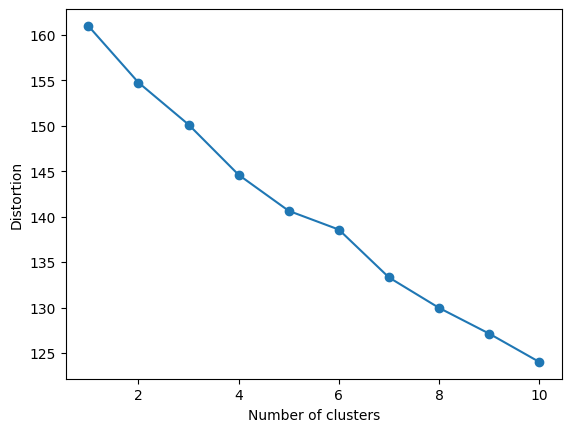

In [393]:
plot_distortion(df_scaled,max_clusters=10)

### Fitting Model with Optimal Number of Clusters

In [394]:
km = KMeans(n_clusters=5, # clusters we expected 
            n_init=15, # initial runs
            random_state=0)

In [395]:
y_km = km.fit_predict(df_scaled)

In [396]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

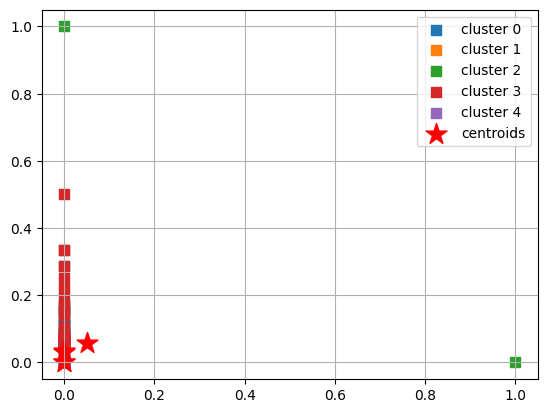

In [397]:
plot_clusters(df_scaled, y_km, plt_cluster_centers= True)